In [7]:
import numpy as np
import matplotlib.pyplot as plt

from CyRK import __version__, nbsolve_ivp, pysolve_ivp
from CyRK.cy.cysolver_test import cytester 

print("CyRK", __version__)

from performance import diffeqs
if 'Lorenz-ExtraOut' in diffeqs:
    del diffeqs['Lorenz-ExtraOut']

CyRK 0.14.0.dev13


## CyRK - pysolve_ivp

130 μs ± 1.69 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
size = 57


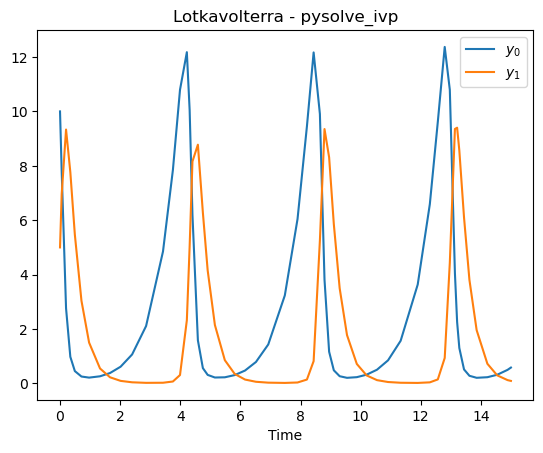

80.7 μs ± 692 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
size = 43


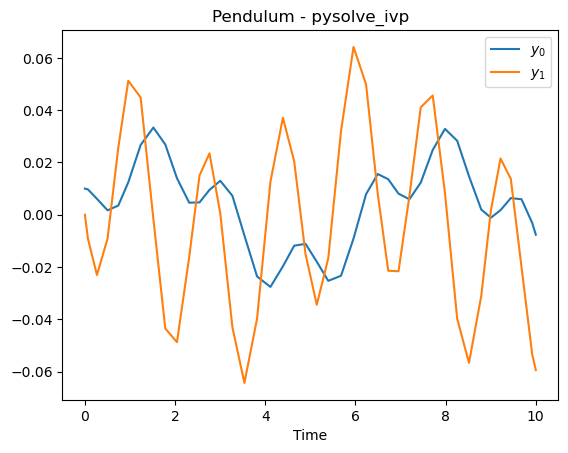

191 μs ± 3.66 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
size = 89


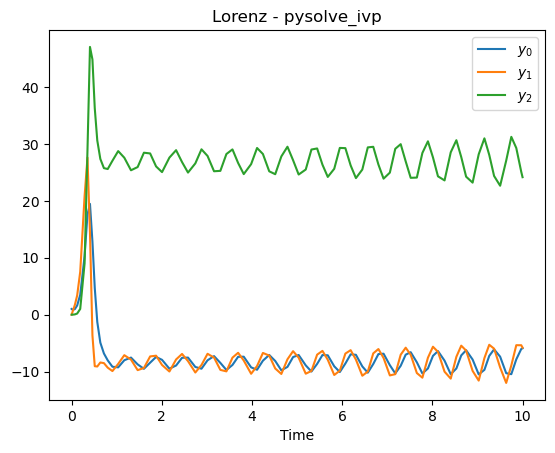

In [2]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverDiffeqInt) in diffeqs.items():
            
    time_span = timespans[0]
    result = pysolve_ivp(cy_diffeq, time_span, y0, args=args_, method='RK45', pass_dy_as_arg=True)
    %timeit pysolve_ivp(cy_diffeq, time_span, y0, args=args_, method='RK45', pass_dy_as_arg=True)
    print("size =", result.t.size)
    y_len = result.num_y
        
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(result.t, result.y[i, :], label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - pysolve_ivp', xlabel='Time')
    ax.legend(loc='best')
    plt.show()
    

## CyRK - CySolver

10.6 μs ± 88.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
size = 57


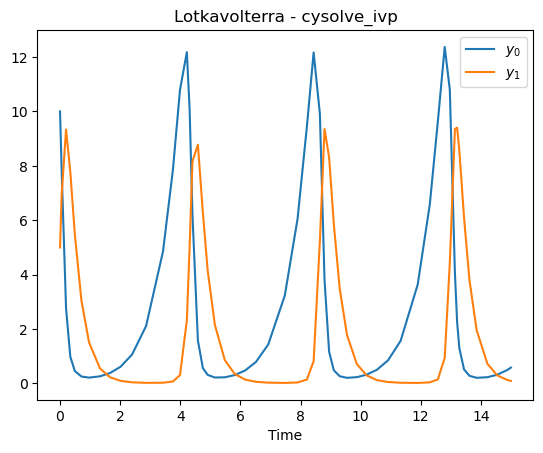

9.67 μs ± 214 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
size = 43


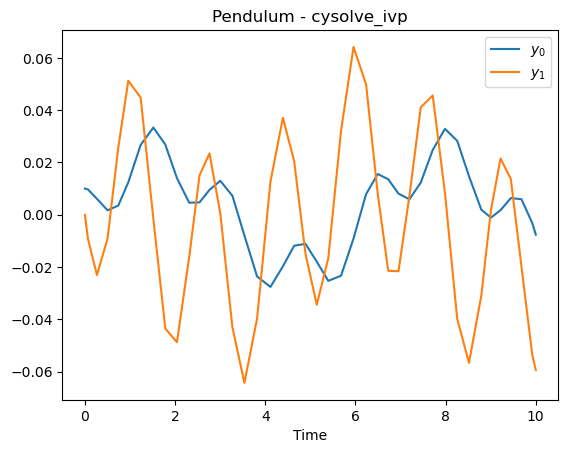

15.5 μs ± 187 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
size = 89


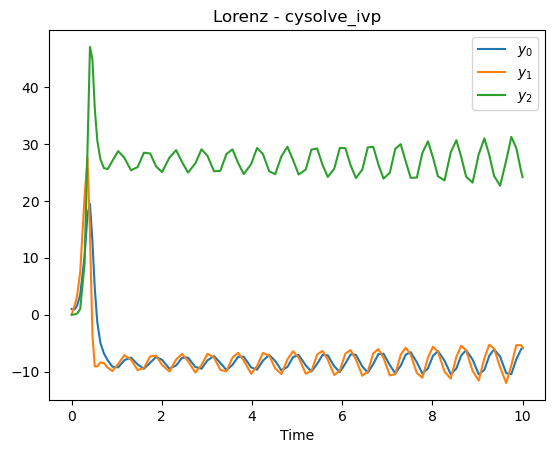

In [8]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverDiffeqInt) in diffeqs.items():
            
    time_span = timespans[0]
    args_arr = np.asarray(args_)
    result = cytester(CySolverDiffeqInt, time_span, y0, args=args_arr, method='rk45')
    %timeit cytester(CySolverDiffeqInt, time_span, y0, args=args_arr, method='rk45')
    print("size =", result.t.size)
    y_len = result.num_y
        
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(result.t, result.y[i, :], label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - cysolve_ivp', xlabel='Time')
    ax.legend(loc='best')
    plt.show()

## CyRK - nbsolve_ivp

130 μs ± 5.99 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
size = 57


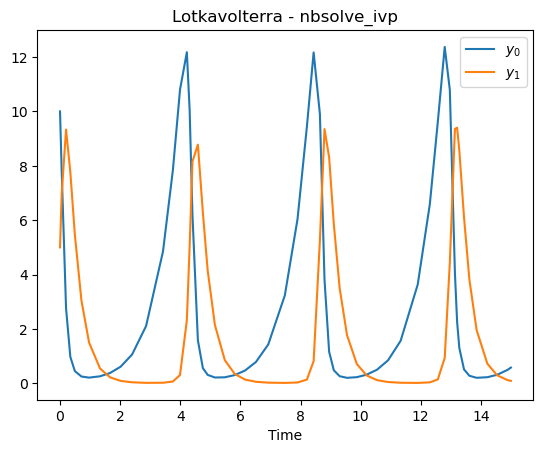

104 μs ± 996 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
size = 43


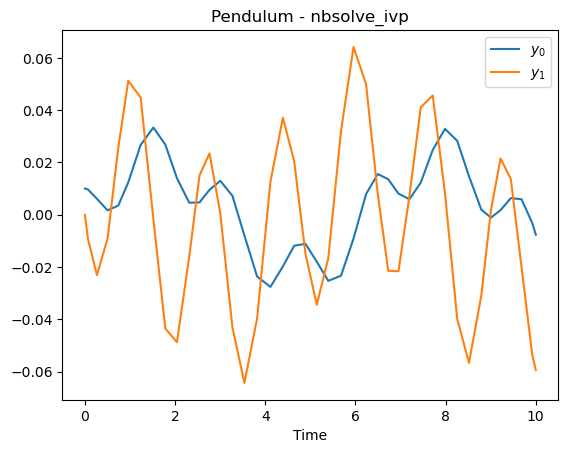

133 μs ± 2.12 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
size = 89


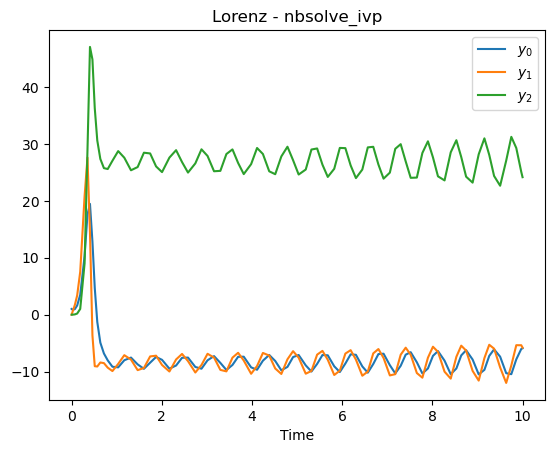

In [9]:
for diffeq_name, (cy_diffeq, nb_diffeq, args_, y0, timespans, CySolverDiffeqInt) in diffeqs.items():
    
    time_span = timespans[0]
    result = nbsolve_ivp(nb_diffeq, time_span, y0, args_, rk_method=1)
    %timeit nbsolve_ivp(nb_diffeq, time_span, y0, args_, rk_method=1)
    print("size =", result.t.size)
    y_len = result.num_y
    
    fig, ax = plt.subplots()
    for i in range(y_len):
        ax.plot(result.t, result.y[i, :], label=f'$y_{i}$')
    ax.set(title=f'{diffeq_name} - nbsolve_ivp', xlabel='Time')
    ax.legend(loc='best')
    plt.show()